In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/data.csv")

In [3]:
df.head()

,X,y
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


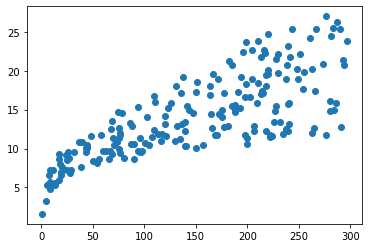

In [4]:
plt.scatter(df["X"], df["y"])
plt.show()

In [5]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1]))
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.01))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(df["X"], df["y"], epochs=500)

Epoch 1/500
7/7 [==============================] - 0s 2ms/step - loss: 11.8177
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 11.8304
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 11.8495
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 11.8912
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 11.8180
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 12.0019
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 11.8352
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 11.7899
Epoch 9/500
7/7 [==============================] - 0s 2ms/step - loss: 11.7193
Epoch 10/500
7/7 [==============================] - 0s 2ms/step - loss: 12.1809
Epoch 11/500
7/7 [==============================] - 0s 2ms/step - loss: 11.7283
Epoch 12/500
7/7 [==============================] - 0s 2ms/step - loss: 11.8555
Epoch 13/500
7/7 [==============================]

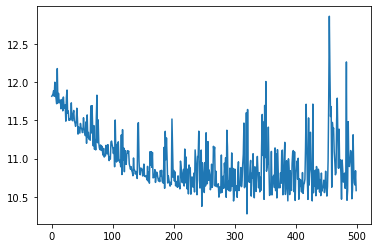

In [14]:
plt.plot(history.history['loss'])
plt.show()

In [15]:
df["prediction"] = model.predict(df["X"])

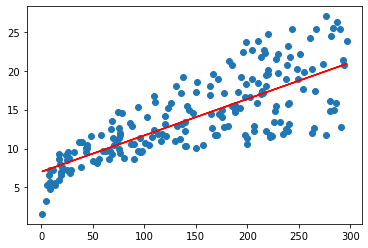

In [16]:
plt.scatter(df["X"], df["y"])
plt.plot(df["X"], df["prediction"], color='r')
plt.show()

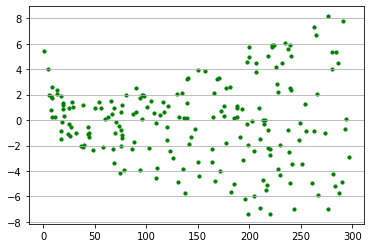

In [17]:
plt.grid(axis='y')
plt.scatter(df["X"], df["prediction"]-df["y"], color = "green", s = 10, label = 'Residual Plot')
plt.show()

In [18]:
Y=np.array(df["y"])
Y_pred=np.array(df["prediction"])
mean_y = np.mean(Y)
r_score =1 - ( np.sum((Y_pred-Y)**2) / np.sum((Y-mean_y)**2) )
print(r_score)

0.6111305763481645


Below is the implementation using Linear Model imported from sklearn

In [19]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
X=np.array(df["X"])
X=X.reshape(-1,1)
reg.fit(X, df["y"])

print('Coefficients: ', reg.coef_)
 
print('Variance score: {}'.format(reg.score(X, df["y"])))

Coefficients:  [0.04753664]
Variance score: 0.611875050850071


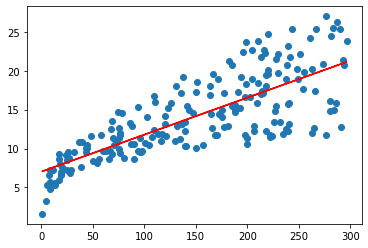

In [20]:
plt.scatter(df["X"], df["y"])
plt.plot(df["X"], reg.predict(X), color='r')
plt.show()

Model implementation using TensorFlow


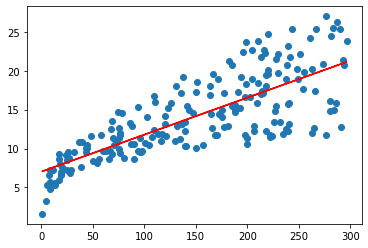

Variance score: 0.6111305763481645


Model implementation using SKLearn


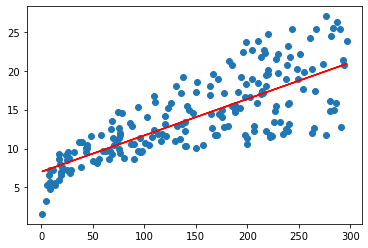

Variance score: 0.611875050850071


In [21]:
print("Model implementation using TensorFlow")
plt.scatter(df["X"], df["y"])
plt.plot(df["X"], reg.predict(X), color='r')
plt.show()
print('Variance score: {}'.format(r_score))

print("\n\nModel implementation using SKLearn")
plt.scatter(df["X"], df["y"])
plt.plot(df["X"], df["prediction"], color='r')
plt.show()
print('Variance score: {}'.format(reg.score(X, df["y"])))